# Data Understanding Notebook

The goal of this notebook is to understand the given dataset.

In [1]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from data_viz_helpers import *
import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2
%reload_ext autoreload



In [2]:
DATA_FOLDER = 'data/'
data_file = DATA_FOLDER+'test.csv'

y_trai, tx_train, ids_train = load_csv_data(DATA_FOLDER+'train.csv',sub_sample=False)

y_test, tx_test, ids_test = load_csv_data(DATA_FOLDER+'test.csv',sub_sample=False)

AAA = 0
BBB = 0 # not to reset index multiples times

train = pd.DataFrame(tx_train)
y_train = pd.DataFrame(y_trai)
test = pd.DataFrame(tx_test)
y_test = pd.DataFrame(y_test)

# columns of the csv file
columns = ['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']

#columns of our numpy arrays
desired_cols = ['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt']


# rename the columns with their original name
train.columns = desired_cols
test.columns = desired_cols
y_train.columns = ['Prediction']

In [3]:
train_ori = train.copy()
test_ori = test.copy()
if BBB == 0:
    train.reset_index(drop=False,inplace=True)
    test.reset_index(drop=False,inplace=True)
    y_train.reset_index(drop=False,inplace=True)
    y_test.reset_index(drop=False,inplace=True)
train.replace(-999, np.nan,inplace=True)
test.replace(-999, np.nan,inplace=True)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 31 columns):
index                          250000 non-null int64
DER_mass_MMC                   211886 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           72543 non-null float64
DER_mass_jet_jet               72543 non-null float64
DER_prodeta_jet_jet            72543 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         72543 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi    

In [5]:
# phi and eta
df_tmp = train.copy()
df_tmp = df_tmp[[  'PRI_jet_subleading_phi','PRI_jet_leading_phi','PRI_tau_phi','PRI_lep_phi','PRI_met_phi',\
                   'PRI_jet_subleading_eta','PRI_jet_leading_eta','PRI_lep_eta','PRI_tau_eta',\
                   'DER_met_phi_centrality','DER_lep_eta_centrality']]
df_tmp.describe()

,PRI_jet_subleading_phi,PRI_jet_leading_phi,PRI_tau_phi,PRI_lep_phi,PRI_met_phi,PRI_jet_subleading_eta,PRI_jet_leading_eta,PRI_lep_eta,PRI_tau_eta,DER_met_phi_centrality,DER_lep_eta_centrality
count,72543.000000,150087.000000,250000.000000,250000.000000,250000.000000,72543.000000,150087.000000,250000.000000,250000.000000,250000.000000,72543.000000
mean,-0.001582,-0.012393,-0.008171,0.043543,-0.010119,-0.011845,-0.003275,-0.019507,-0.010973,-0.128305,0.458290
std,1.816950,1.813385,1.816763,1.816611,1.812223,2.031743,1.784546,1.264982,1.214079,1.193585,0.398681
min,-3.142000,-3.142000,-3.142000,-3.142000,-3.142000,-4.500000,-4.499000,-2.505000,-2.499000,-1.414000,0.000000
25%,-1.576500,-1.584000,-1.575000,-1.522000,-1.575000,-1.612000,-1.342000,-1.014000,-0.925000,-1.371000,0.004000
50%,-0.002000,-0.033000,-0.033000,0.086000,-0.024000,-0.010000,0.000000,-0.045000,-0.023000,-0.356000,0.454000
75%,1.576000,1.562000,1.565000,1.618000,1.561000,1.589500,1.336000,0.959000,0.898000,1.225000,0.879000
max,3.142000,3.141000,3.142000,3.142000,3.142000,4.500000,4.499000,2.503000,2.497000,1.414000,1.000000


In [6]:
# pt's
df_tmp = train.copy()
df_tmp = df_tmp[[  'PRI_jet_leading_pt','PRI_jet_subleading_pt','PRI_jet_all_pt','DER_sum_pt','PRI_lep_pt','PRI_tau_pt',\
                   'DER_pt_h','DER_pt_tot']][df_tmp['PRI_jet_all_pt']!=0] # taking out jet0
df_tmp.describe()

,PRI_jet_leading_pt,PRI_jet_subleading_pt,PRI_jet_all_pt,DER_sum_pt,PRI_lep_pt,PRI_tau_pt,DER_pt_h,DER_pt_tot
count,150087.000000,72543.000000,150087.000000,150087.000000,150087.000000,150087.000000,150087.000000,150087.000000
mean,84.822105,57.679474,121.703731,213.056414,49.520003,41.832681,87.234780,22.308055
std,60.662276,31.985782,100.413845,120.269295,25.473017,25.648489,66.412457,24.748900
min,30.000000,30.000000,30.000000,77.017000,26.000000,20.000000,0.000000,0.000000
25%,44.422500,37.312000,48.947000,129.789500,32.780000,25.507500,42.135500,3.425000
50%,65.561000,47.902000,91.762000,178.643000,41.844000,33.874000,67.630000,18.231000
75%,103.342000,66.637000,159.062000,257.436000,57.487000,48.957000,111.598000,31.004500
max,1120.573000,721.456000,1633.433000,1852.462000,461.896000,622.862000,1053.807000,513.659000


In [7]:
# rest
df_tmp = train.copy()
df_tmp = df_tmp[['DER_mass_MMC', 'DER_mass_transverse_met_lep',\
                   'DER_mass_vis',\
                   'DER_deltaeta_jet_jet','DER_mass_jet_jet','DER_prodeta_jet_jet',
                   'DER_deltar_tau_lep','DER_pt_ratio_lep_tau', 'PRI_met','PRI_met_sumet']][df_tmp['PRI_jet_num']!=0]
df_tmp.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_ratio_lep_tau,PRI_met,PRI_met_sumet
count,138096.000000,150087.000000,150087.000000,72543.000000,72543.000000,72543.000000,150087.000000,150087.000000,150087.000000,150087.000000
mean,122.494858,42.884762,80.723762,2.403735,371.783360,-0.821688,2.178808,1.467463,48.494382,265.673665
std,60.043466,36.028021,42.575765,1.742226,397.699325,3.584362,0.778822,0.980422,37.593736,130.255341
min,9.806000,0.000000,6.329000,0.000000,13.602000,-18.066000,0.208000,0.047000,0.200000,21.066000
25%,92.743000,13.958000,58.469500,0.882500,111.977000,-2.629000,1.594000,0.823000,24.297000,176.799000
50%,112.831000,34.806000,72.557000,2.107000,225.885000,-0.244000,2.208000,1.246000,39.470000,236.984000
75%,134.684000,65.157500,90.913000,3.690000,478.226000,0.958000,2.759000,1.825000,61.028000,321.399500
max,1192.026000,690.075000,1329.913000,8.503000,4974.979000,16.690000,5.655000,19.773000,951.363000,2003.976000


## now a generic part: 


In [8]:
# dataframe with also the predictions
train_tot = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')

# Separation of the dataset for the 4 different values of PRI_jet_num
jet0, jet1, jet2, jet3 = jet_separation(train_tot)

# Print proportions of predicted signal in the train dataset
proportions(train, y_train, num_jet=0)
proportions(train, y_train, num_jet=1)
proportions(train, y_train, num_jet=2)
proportions(train, y_train, num_jet=3)

Data: (250000, 32)
 jet0: (99913, 32) 39.9652%
 jet1: (77544, 32) 31.0176%
 jet2: (50379, 32) 20.1516%
 jet3: (22164, 32) 8.8656%
totat= 250000
Proportions of signal for jet0 are: 0.2551419735169598
Proportions of signal for jet1 are: 0.35734550706695556
Proportions of signal for jet2 are: 0.5108080747930686
Proportions of signal for jet3 are: 0.3036906695542321


In [9]:
merged_df = pd.merge(y_train,train, left_on='index', right_on='index', how = 'right')
background = merged_df[merged_df['Prediction']==-1.0]
signal = merged_df[merged_df['Prediction']==1.0]

# print NaNs for signal and for background
print ('NAN in signal: ',signal['DER_mass_MMC'].isnull().sum(), \
       '         NAN in background: ',background['DER_mass_MMC'].isnull().sum() )

NAN in signal:  2835          NAN in background:  35279


## some test to extract the name of data for the plotting

In [10]:
# to have a quick comparison between signal and background per jet
'''compare_jets_tot(train_tot,jet0,jet1,jet2,jet3,'train_tot')'''

"compare_jets_tot(train_tot,jet0,jet1,jet2,jet3,'train_tot')"

In [11]:
# nice plots with colors comparing bins of data
'''compare_jets_sns(train,jet0,jet1,jet2,jet3,'train')'''

"compare_jets_sns(train,jet0,jet1,jet2,jet3,'train')"

### Plot correlation matrix 

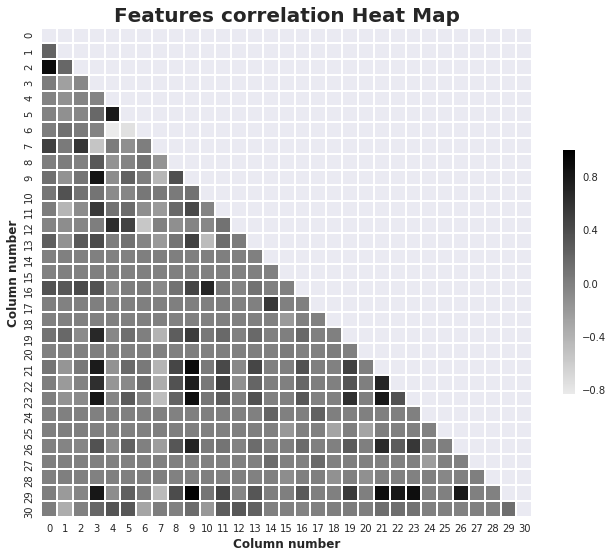

In [12]:
train_tot_corr = train_tot[['DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt','Prediction']].copy()


train_tot_corr.columns = ['0', '1','2', '3', '4', '5',\
       '6', '7', '8', '9','10', '11','12', '13', '14', '15',\
       '16', '17', '18', '19', '20',\
       '21', '22', '23','24', '25', '26','27', '28', '29','30']



# Compute the correlation matrix
corr = train_tot_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
sns.set_style("whitegrid")

# gray_r

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='gray_r', center=0, #vmax=.3,
            square=False, linewidths=1, cbar_kws={"shrink": .5})

plt.title("Features correlation Heat Map", fontsize=20).set_weight('bold')
plt.xlabel( 'Column number' ,fontsize=12).set_weight('bold')
plt.ylabel('Column number', fontsize=12).set_weight('bold')

plt.savefig('Correlation_matrix.png', bbox_inches='tight')


In [13]:
# to have a comparison between signal and background with distribution plots
# also available as a .png in this same folder
# the most insighful plot!!!!
# uncomment to plot it (not visible in notebook due to its size)

'''compare_jets_dist(train,jet0,jet1,jet2,jet3,'train_')'''

"compare_jets_dist(train,jet0,jet1,jet2,jet3,'train_')"